# Разведочный анализ данных

Это задание посвящено изучению данных и построению различных визуализаций.  
Наша цель - провести **разведочный анализ данных**, чтобы исследовать поведение данных и выявить в них закономерности.

Мы будем работать с датассетом пассажиров [Титаника](https://en.wikipedia.org/wiki/Titanic).

Классическая задача, решаемая на этих данных: предсказать, выжил пассажир или нет по его характеристикам.  
То есть целевая переменная - столбец `Survived`.

Цели:
* познакомиться с библиотекой `seaborn`
* научиться делать различные визуализации
* заполнять пропуски в данных
* делать однофакторный анализ
* конструировать новые признаки

Бонус:
* придумаем свою модель на основе проведенного анализа и оценим ее качество.

## Подключение библиотек и загрузка данных

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

Фиксируем `random_state` для воспроизводимости случайных значений.

In [107]:
RANDOM_STATE = 42

Загрузим данные.

In [108]:
Data = pd.read_csv(
    "https://raw.githubusercontent.com/evgpat/edu_stepik_practical_ml/main/datasets/titanik.csv",
    sep=";"
    )

**Описание признаков**

- `Survived` — выжил данный пассажир или нет (*0* для умерших, *1* для выживших)
- `Pclass` — класс пассажира (*1* — высший, *2* — средний, *3* — низший)
- `Name` — имя
- `Sex` — пол
- `Age` — возраст
- `SibSp` — количество братьев, сестер, сводных братьев, сводных сестер, супругов на борту титаника
- `Parch` — количество родителей, детей (в том числе приемных) на борту титаника
- `Ticket` — номер билета
- `Fare` — плата за проезд
- `Cabin` — каюта
- `Embarked` — порт посадки (*C* — Шербур; *Q* — Квинстаун; *S* — Саутгемптон)

## Обзор данных

Посмотрим на *5* случайных объектов из датасета.

In [109]:
Data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
42,43,0,3,Kraeff; Mr. Theodor,male,NaN,0,0,349253,7.8958,NaN,C
686,687,0,3,Panula; Mr. Jaako Arnold,male,14.0,4,1,3101295,39.6875,NaN,S
243,244,0,3,Maenpaa; Mr. Matti Alexanteri,male,22.0,0,0,STON/O 2. 3101275,7.1250,NaN,S
546,547,1,2,Beane; Mrs. Edward (Ethel Clarke),female,19.0,1,0,2908,26.0000,NaN,S
716,717,1,1,Endres; Miss. Caroline Louise,female,38.0,0,0,PC 17757,227.5250,C45,C


Выведите на экран размеры таблицы *Data*.

**Вопрос:** сколько объектов в данных?

In [110]:
# ваш код здесь
Data.shape[0]

891

## Обработка признаков и однофакторный анализ

На данном этапе:

1) Найдем признаки, у которых есть пропущенные значения и обработаем эти пропущенные значения

2) Переведём категориальные признаки в числовые

Выведем на экран основные числовые характеристики числовых столбцов.  
Это можно сделать при помощи функции `describe`.

In [111]:
Data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


В строке *count* отображается количество непропущенных значений в каждом столбце.

Основные статистики можно посмотреть и по категориальным колонкам.  
Для этого в функцию `describe` нужно передать аргумент `include='object'`.

Сделайте это.

In [112]:
# ваш код здесь
Data.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,3,681,147,3
top,Braund; Mr. Owen Harris,male,347082,B96 B98,S
freq,1,574,7,4,644


In [113]:
Data.select_dtypes('object').isna().sum()

Name          0
Sex           0
Ticket        0
Cabin       687
Embarked      2
dtype: int64

**Вопрос:** в скольких категориальных колонках есть пропуски?

### Столбец Sex

В столбце пол (`Sex`) три различных значения. Посмотрим на них.

In [114]:
Data['Sex'].value_counts()

Sex
male       574
female     312
unknown      5
Name: count, dtype: int64

Удалим пассажиров неизвестного пола, так как их всего *5*.

In [115]:
Data = Data[Data['Sex'] != 'unknown']

Проверьте, что строки с неизвестным полом исчезли.

In [116]:
# ваш код здесь
Data['Sex'].unique()

array(['male', 'female'], dtype=object)

Признак `Sex` является категориальным, то есть содержит нечисловые значения. Для работы большинства алгоритмов необходимо переводить категории в числа.

Закодировать значения столбца с двумя категориями можно следующим образом. Пусть в воображаемом столбце *animal* есть два значения: *cat* и *dog*. Их можно перевести в *0* и *1* при помощи функции `map`:

`Data['animal'] = Data['animal'].map({'cat' : 1, 'dog' : 0})`


По аналогии закодируйте столбец `Sex` (*male* - *1*, *female* - *0*).

In [117]:
# ваш код здесь
df = pd.DataFrame(['male', 'female', 'male', 'female'], columns=['Sex'])
df

,Sex
0,male
1,female
2,male
3,female


In [118]:
df['Sex'] = df['Sex'].apply(lambda x: int(x == 'male'))
df

,Sex
0,1
1,0
2,1
3,0


In [119]:
Data['Sex'] = Data['Sex'].map({'male': 1, 'female': 0})
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,1,35.0,0,0,373450,8.0500,NaN,S


**Вопрос** посчитайте сумму значений в закодированном столбце `Sex`.

In [120]:
# ваш код здесь
Data['Sex'].sum()

574

Посмотрим, как влияет пол на выживаемость.

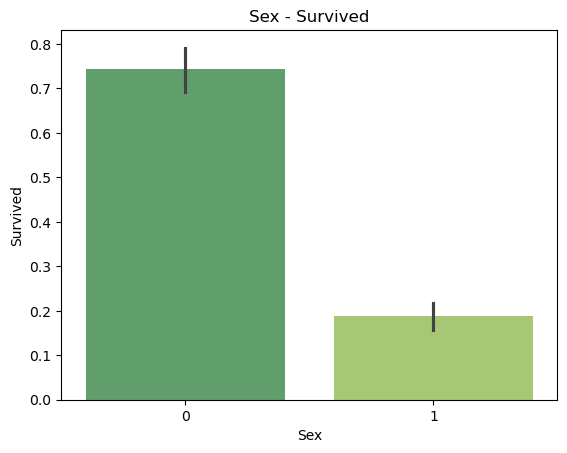

In [121]:
sns.barplot(data=Data ,x='Sex', y='Survived', hue='Sex', palette='summer', legend=False)
plt.title('Sex - Survived')
plt.show();

Гистограмму можно детализировать, добавив значение параметра `hue`.

### Столбец Pclass

Нарисуйте гистограмму выживаемости в зависимости от `Pclass`.  
Используйте `barplot`.

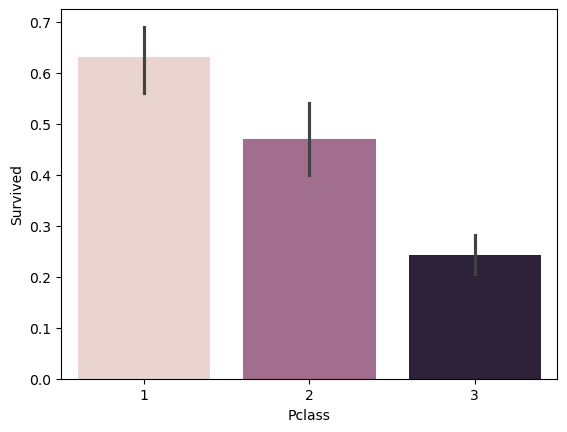

In [122]:
# ваш код здесь
sns.barplot(data=Data, x='Pclass', y='Survived', hue='Pclass', legend=False)

plt.show();

**Вопрос:** пассажиры из какого класса выживали чаще всего?

Посмотрим, как влияет пол человека и класс билета (`Pclass`) на выживаемость

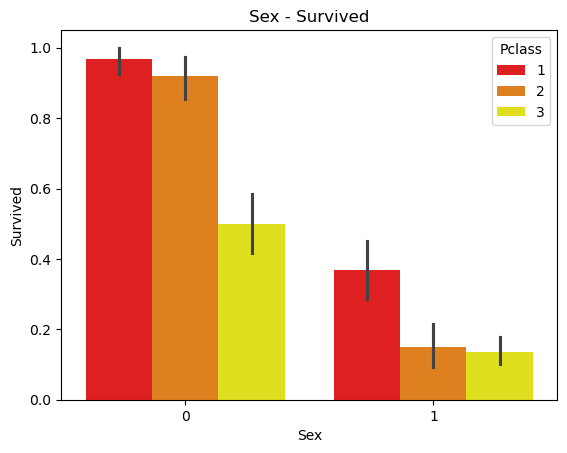

In [123]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=Data, palette='autumn')
plt.title('Sex - Survived')
plt.show();

### Столбец Embarked

**Вопрос** сколько различных значений принимает признак `Embarked`?

In [124]:
# ваш код здесь

Data['Embarked'].nunique()

3

Пока что мы не обсуждали, как переводить в числа категориальные признаки с больше, чем двумя категориями.  
Поэтому давайте отбросим этот признак.

Сделайте это (вам пригодится метод [`drop`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)).

In [125]:
# ваш код здесь
Data = Data.drop(columns='Embarked')
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
0,1,0,3,Braund; Mr. Owen Harris,1,22.0,1,0,A/5 21171,7.2500,NaN
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,0,38.0,1,0,PC 17599,71.2833,C85
2,3,1,3,Heikkinen; Miss. Laina,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),0,35.0,1,0,113803,53.1000,C123
4,5,0,3,Allen; Mr. William Henry,1,35.0,0,0,373450,8.0500,NaN


### Столбец Age

Обработаем признак `Age`.

Мы помним, что в этом признаке много пропусков.

Заполним пропуски медианным значением `Age`.

In [126]:
median_age = Data['Age'].median()

Data['Age'] = Data['Age'].fillna(median_age)

Нарисуем распределение возраста пассажиров.

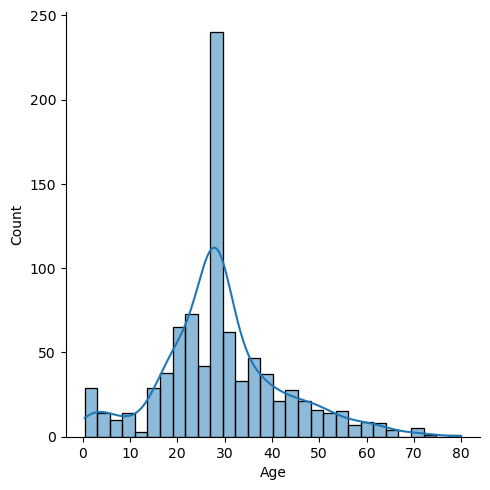

In [127]:
sns.displot(Data['Age'], kde=True)
plt.show();

### Другие столбцы

Удалите признак `Fare`. Он сильно связан с признаком `Pclass`, поэтому нам не нужен.

In [128]:
# ваш код здесь
Data = Data.drop(columns='Fare')
Data.shape

(886, 10)

**Вопрос:** сколько на данный момент колонок в таблице `Data`?

Столбец `PassengerId` является категориальным и не несёт важной информации, удалите его.

Столбцы `Ticket`, `Name` и `Cabin` в этот раз нам также не понадобятся. Удалите и их.

In [129]:
# ваш код здесь
Data = Data.drop(columns=['PassengerId', 'Ticket', 'Name', 'Cabin'])
Data.shape

(886, 6)

После минимальной обработки данных у нас получилась следующая таблица:

In [130]:
Data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


## Исследование признаков

Нарисуйте матрицу корреляций столбцов между собой.

In [131]:
# ваш код здесь
Data.corr().loc['Survived'][1:].abs().sort_values(ascending=False)

Sex       0.545547
Pclass    0.338447
Parch     0.085753
Age       0.062245
SibSp     0.033743
Name: Survived, dtype: float64

**Вопрос:** какой столбец сильнее всего коррелирует с целевой переменной `Survived`?

Посмотрим на попарные зависимости некоторых признаков.

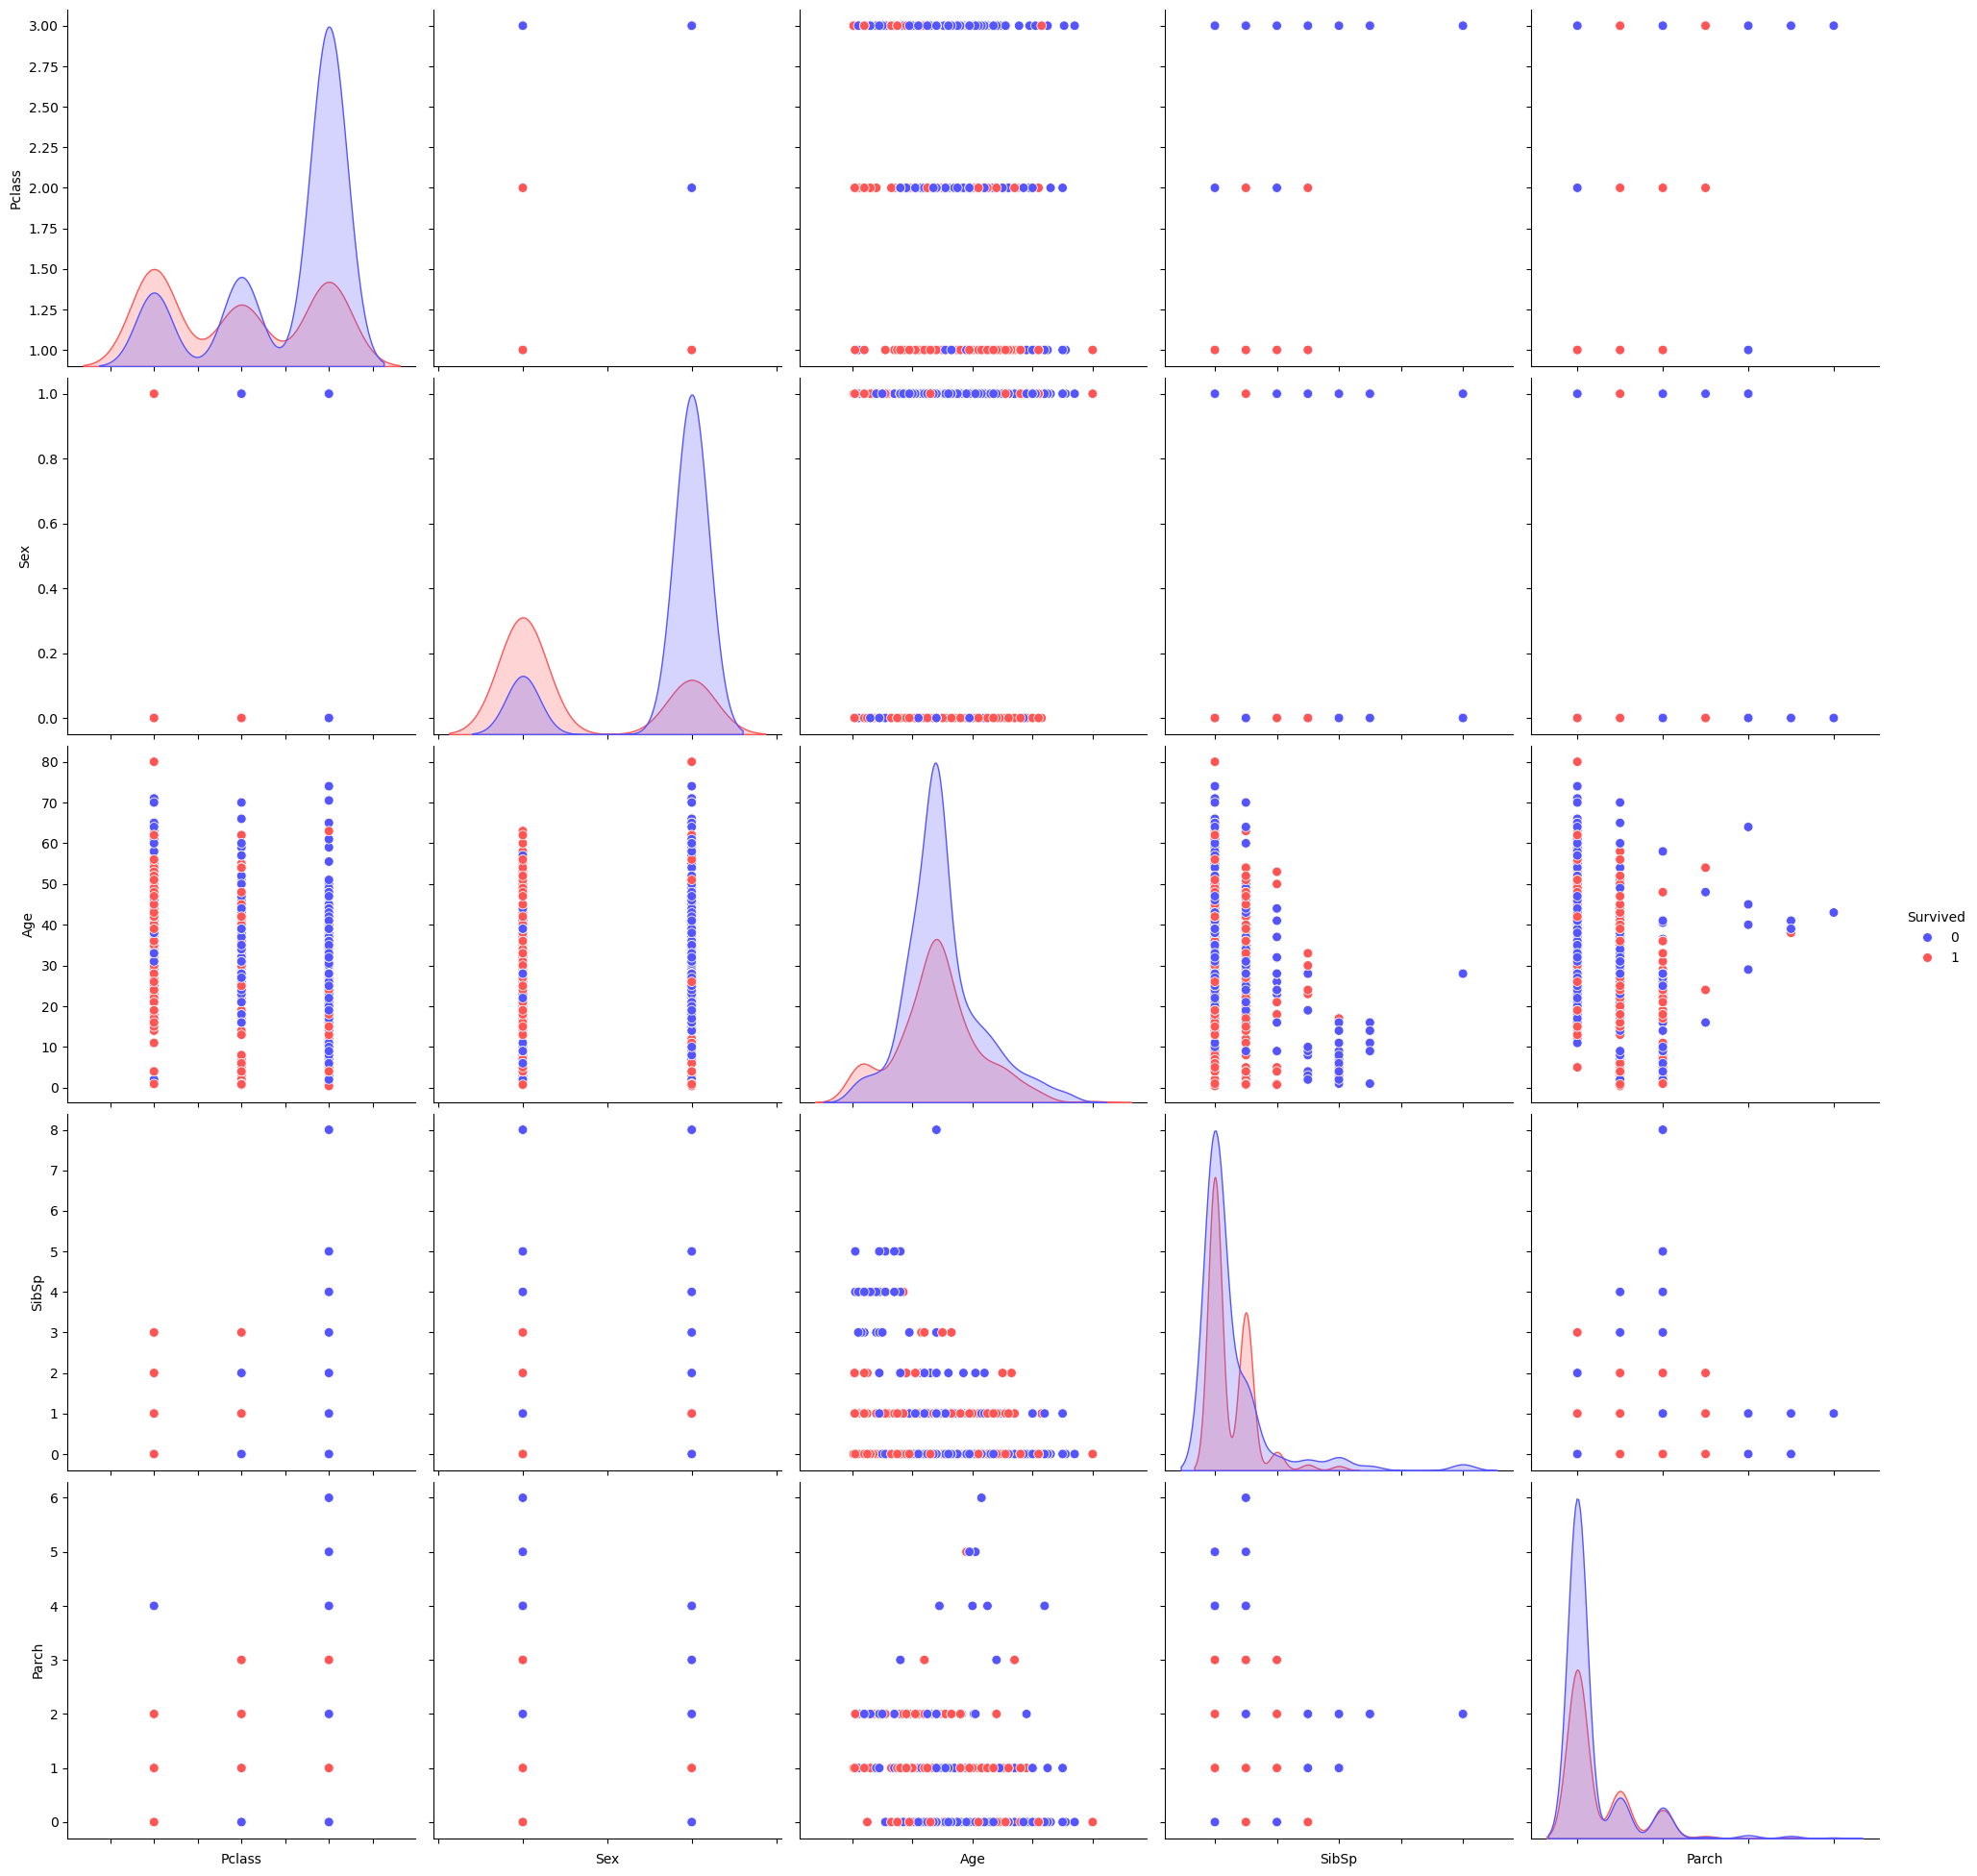

In [132]:
g = sns.pairplot(
    Data,
    hue='Survived',
    palette = 'seismic',
    height=4,
    diag_kind = 'kde',
    diag_kws=dict(fill=True),
    plot_kws=dict(s=50)
    )

g.set(xticklabels=[]);

## Бонус (не проверяется)

Мы не используем всю информацию о данных, в частности, не используем текстовые данные. Также из матрицы корреляций мы видим, что признаки `Parch` и `SibSp` слабо коррелируют с выживаемостью (`Survived`). Можно сконструировать новые признаки, чтобы решить эти вопросы.

Попробуйте сделать следующее.

1) Создайте признак `NameLen` и запишите в него длину имени (`Name`).

2) Создайте признак `FamilySize`, равный *Parch + SibSp + 1*. Зачем добавлять 1?

3) Создайте признак `IsAlone`, который показывает, путешествовал человек один или с семьей.

In [148]:
Data = pd.read_csv(
    "https://raw.githubusercontent.com/evgpat/edu_stepik_practical_ml/main/datasets/titanik.csv",
    sep=";"
    )
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


In [149]:
Data['Sex'] = Data['Sex'].map({'male': 1, 'female': 0})
median_age = Data['Age'].median()
Data['Age'] = Data['Age'].fillna(median_age)

In [150]:
# ваш код здесь
Data['NameLen'] = Data['Name'].apply(len)
Data['FamilySize'] = Data['Parch'] + Data['SibSp'] + 1
Data['IsAlone'] = (Data['FamilySize'] == 1).astype('int16')
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NameLen,FamilySize,IsAlone
0,1,0,3,Braund; Mr. Owen Harris,1.0,22.0,1,0,A/5 21171,7.2500,NaN,S,23,2,0
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,0.0,38.0,1,0,PC 17599,71.2833,C85,C,51,2,0
2,3,1,3,Heikkinen; Miss. Laina,0.0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,22,1,1
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),0.0,35.0,1,0,113803,53.1000,C123,S,44,2,0
4,5,0,3,Allen; Mr. William Henry,1.0,35.0,0,0,373450,8.0500,NaN,S,24,1,1


Посмотрите, как коррелируют новые признаки со столбцом `Survived`.

In [151]:
# ваш код здесь
Data.corr(numeric_only=True).abs().loc['Survived'].sort_values(ascending=False)[1:]

Sex            0.545547
Pclass         0.338481
NameLen        0.332350
Fare           0.257307
IsAlone        0.203367
Parch          0.081629
Age            0.064910
SibSp          0.035322
FamilySize     0.016639
PassengerId    0.005007
Name: Survived, dtype: float64

Можно извлечь и другую полезную информацию из данных путём конструирования новых признаков.

Придумайте ещё новые осмысленные признаки. Проверьте, как они коррелируют с выживаемостью.

In [137]:
# ваш код здесь

Мы провели  однофакторный анализ данных и увидели, какие признаки сильно влияют на выживаемость, а какие нет.

Мы видим, что больше всего на выживаемость влияет пол пассажира.


### Наша собственная модель

Напишем свою модель, предсказывающую выживаемость только по признаку `Sex`.

In [152]:
Data = Data.drop(columns=['PassengerId', 'Name', 'SibSp', 'Ticket', 'Cabin'], errors='ignore')
Data

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,NameLen,FamilySize,IsAlone
0,0,3,1.0,22.0,0,7.2500,S,23,2,0
1,1,1,0.0,38.0,0,71.2833,C,51,2,0
2,1,3,0.0,26.0,0,7.9250,S,22,1,1
3,1,1,0.0,35.0,0,53.1000,S,44,2,0
4,0,3,1.0,35.0,0,8.0500,S,24,1,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1.0,27.0,0,13.0000,S,21,1,1
887,1,1,0.0,19.0,0,30.0000,S,28,1,1
888,0,3,0.0,28.0,2,23.4500,S,40,4,0
889,1,1,1.0,26.0,0,30.0000,C,21,1,1


In [153]:
def prediction(x):
    if x.Sex == 1:
        return 0
    return 1

Посчитаем долю правильных ответов нашей модели.

In [154]:
from sklearn.metrics import accuracy_score

pred = Data.apply(lambda x: prediction(x), axis=1)

accuracy_score(Data['Survived'], pred)

0.7856341189674523